# <u> Machine Learning Internship at Prodigy InfoTech - Customer Clusetring Project </u>

<i>In this project, we are using unsupervised learning algorithms <u> Kmeans </u> to explore the possibilities of grouping customers dataset into similar clusters according to similar demands or purchasing habits to aid in targeted and effecient marketing campaigns</i>

## import important libraries

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.cluster import KMeans
sns.set_style('darkgrid')


## Load Data

In [125]:
data=pd.read_csv('Mall_Customers.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## <i>  Checking Missing Values </i>

In [126]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Nice, There is no missing values

##  <i>  Checking duplicate Values </i>

In [127]:
data.duplicated().sum()

0

Nice , There is no duplicate values

## <i>  Get Statistical Information </i> 

In [128]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## <u> Distributions of columns :-  </u>

<i>In this step, we plot histograms for various numerical columns within our dataset to gain a deeper understanding of the data distribution.</i>

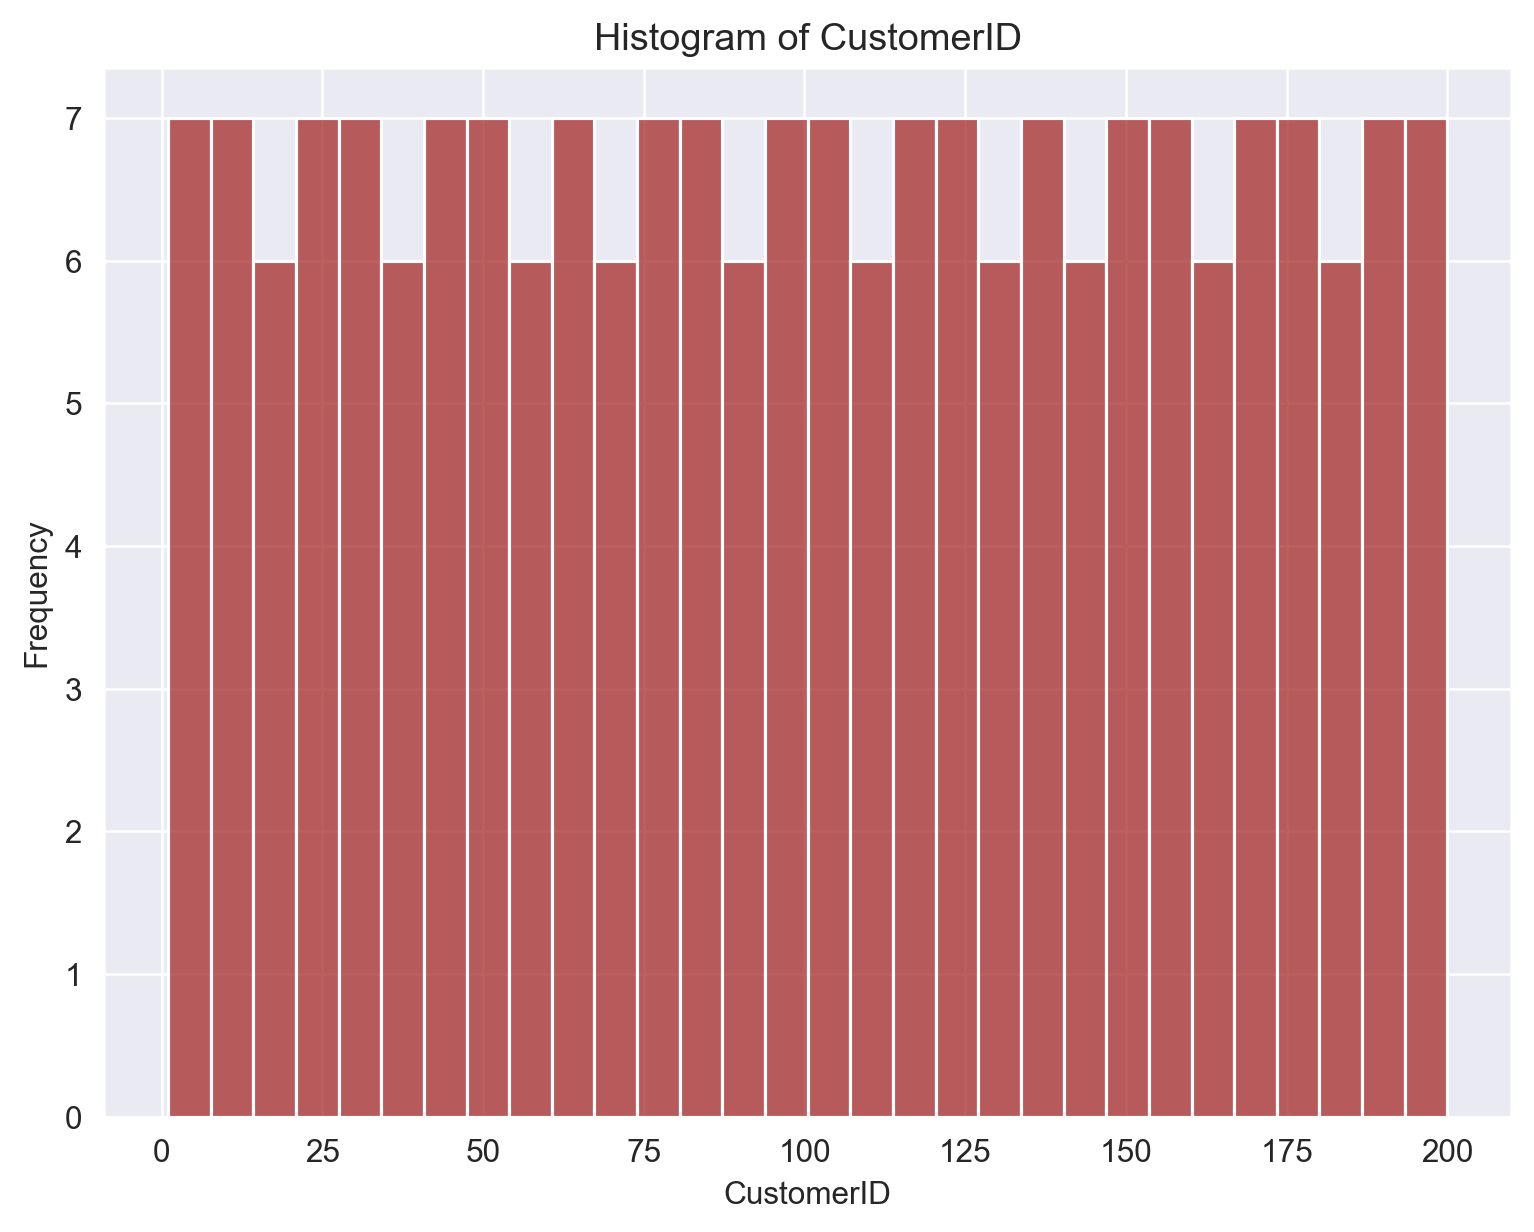

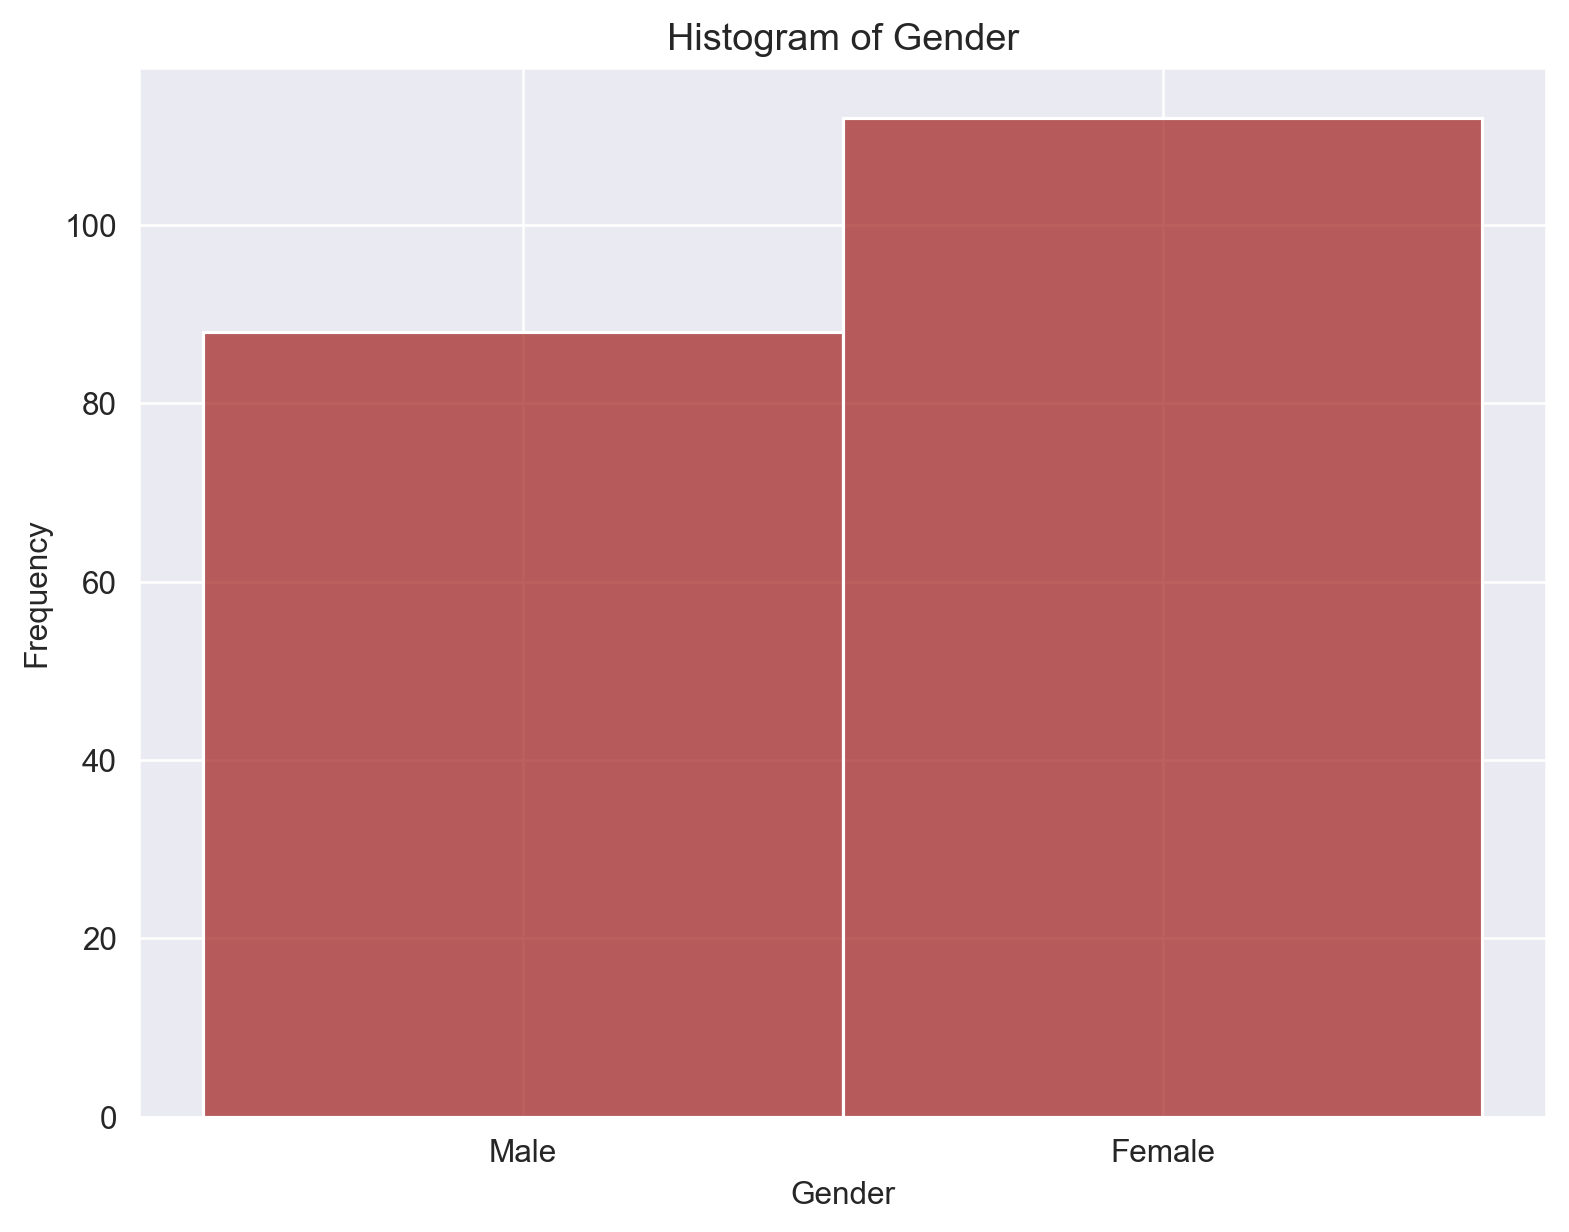

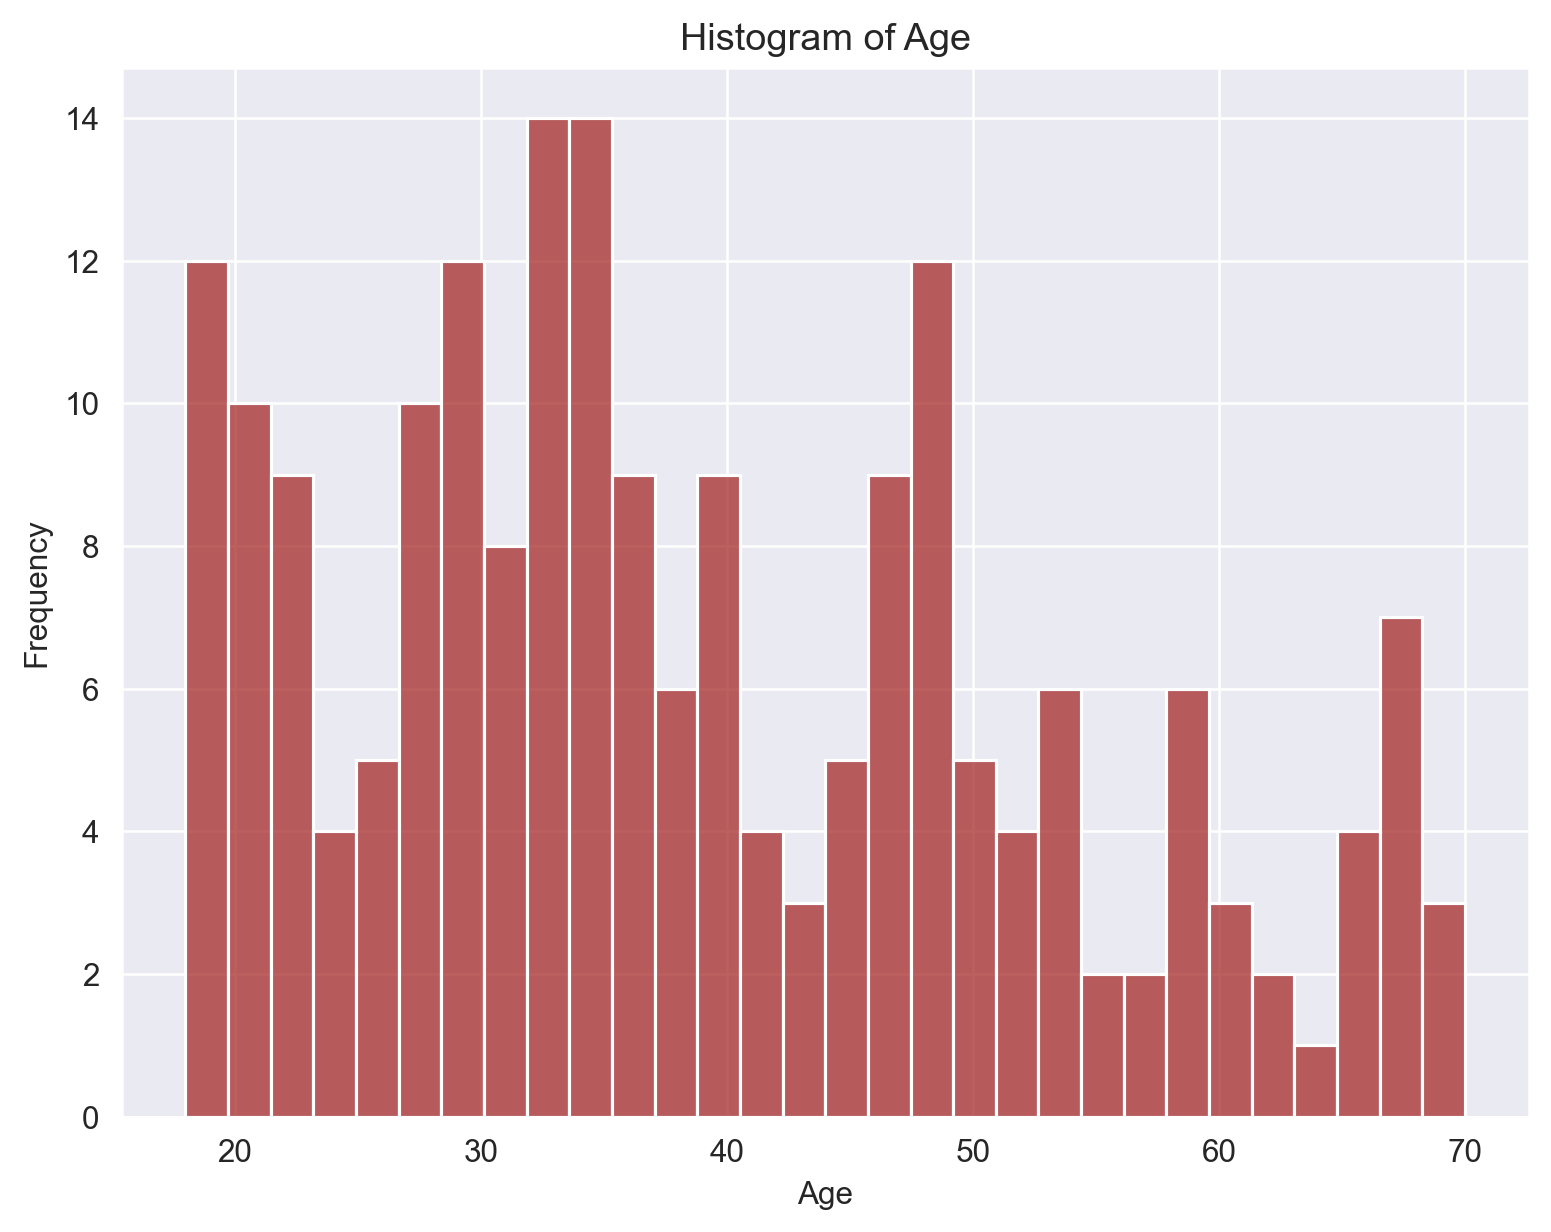

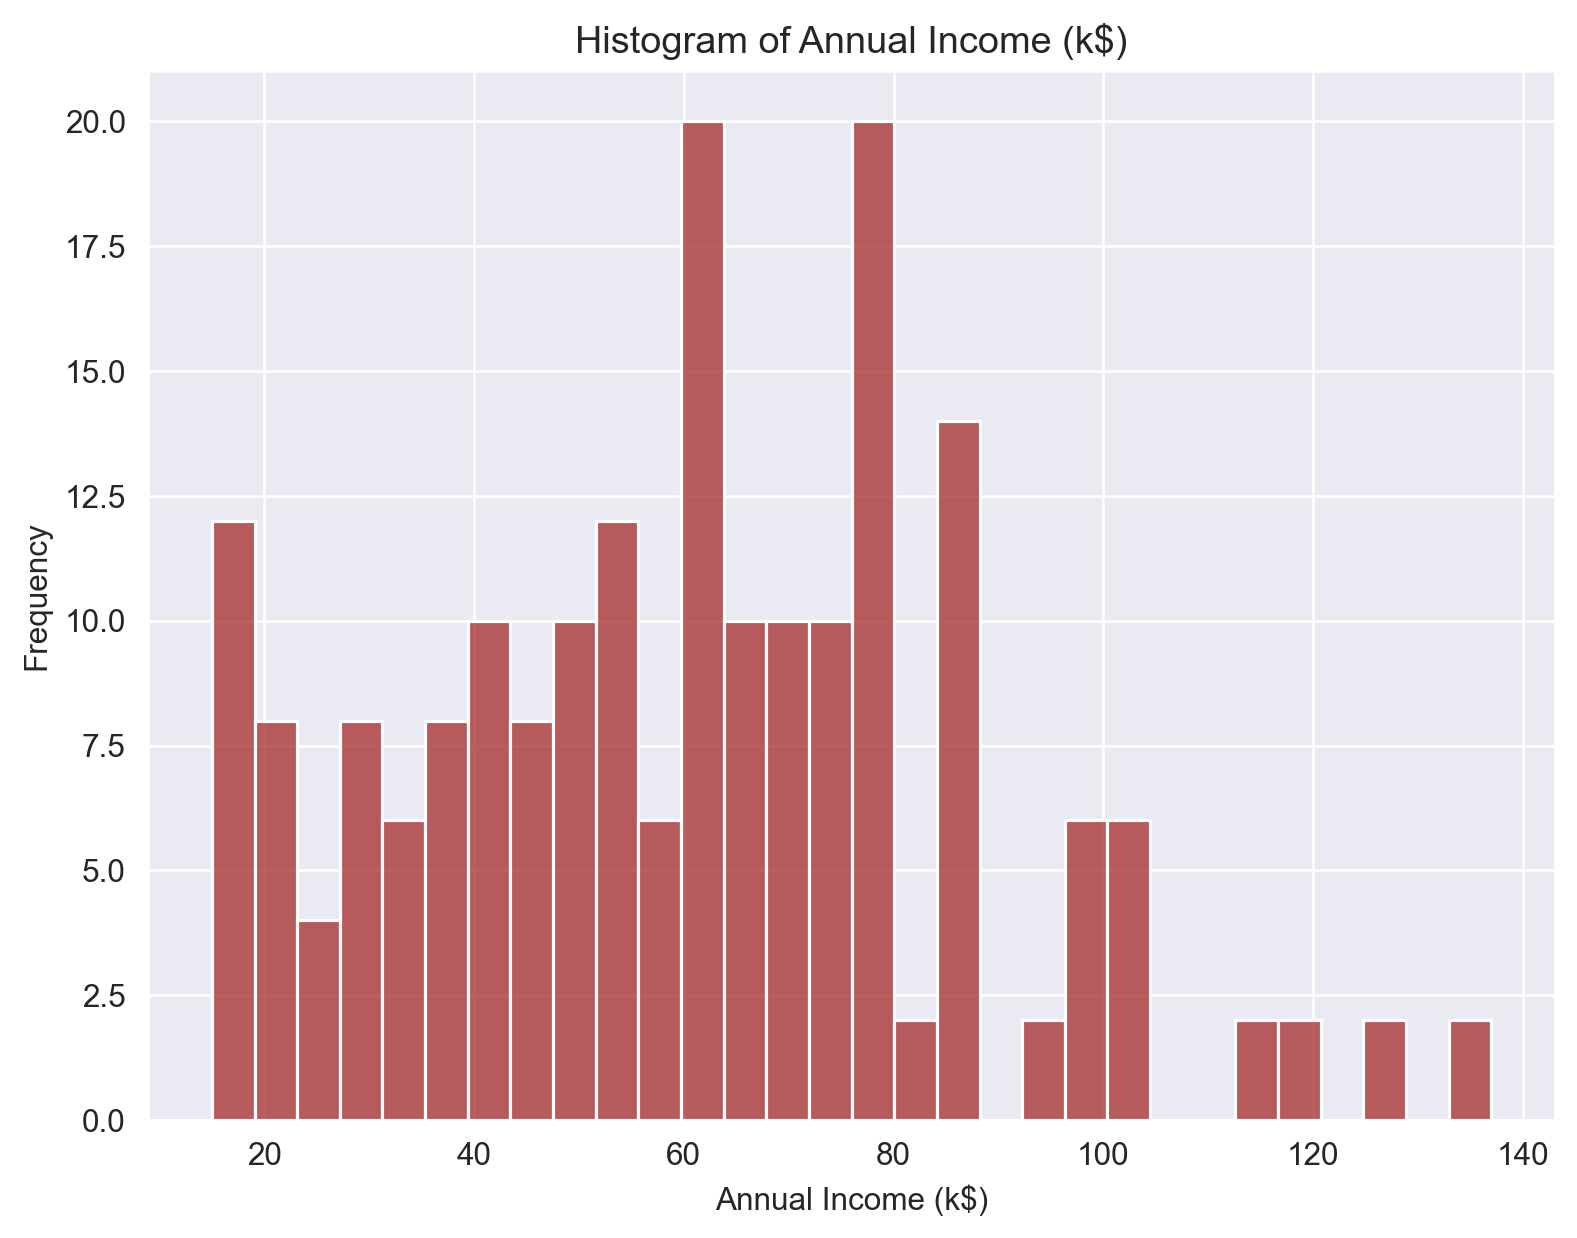

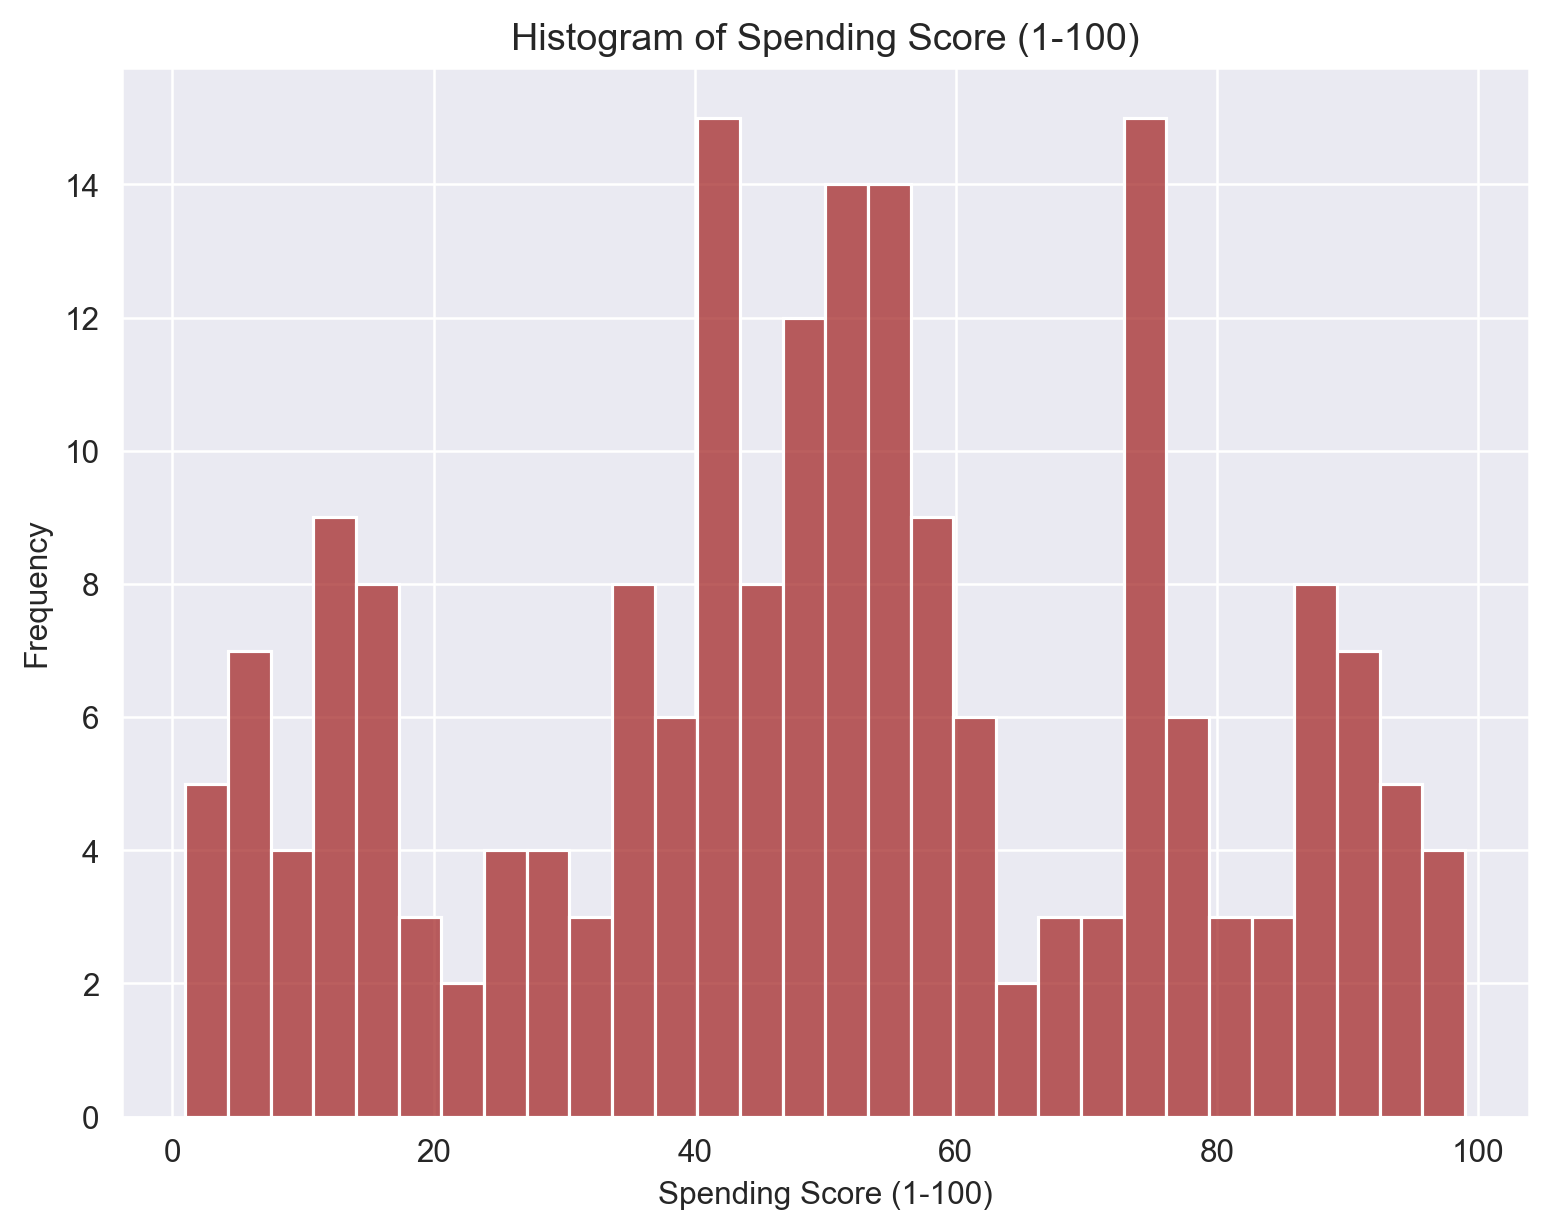

In [129]:
for col in data:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=30,color='brown')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Encoding Categorical Features

In [130]:
new_data=pd.get_dummies(data)

In [131]:
new_data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False


# Computing correlation between  features

<Axes: title={'center': 'Heatmap showing correlation for all numerical features'}>

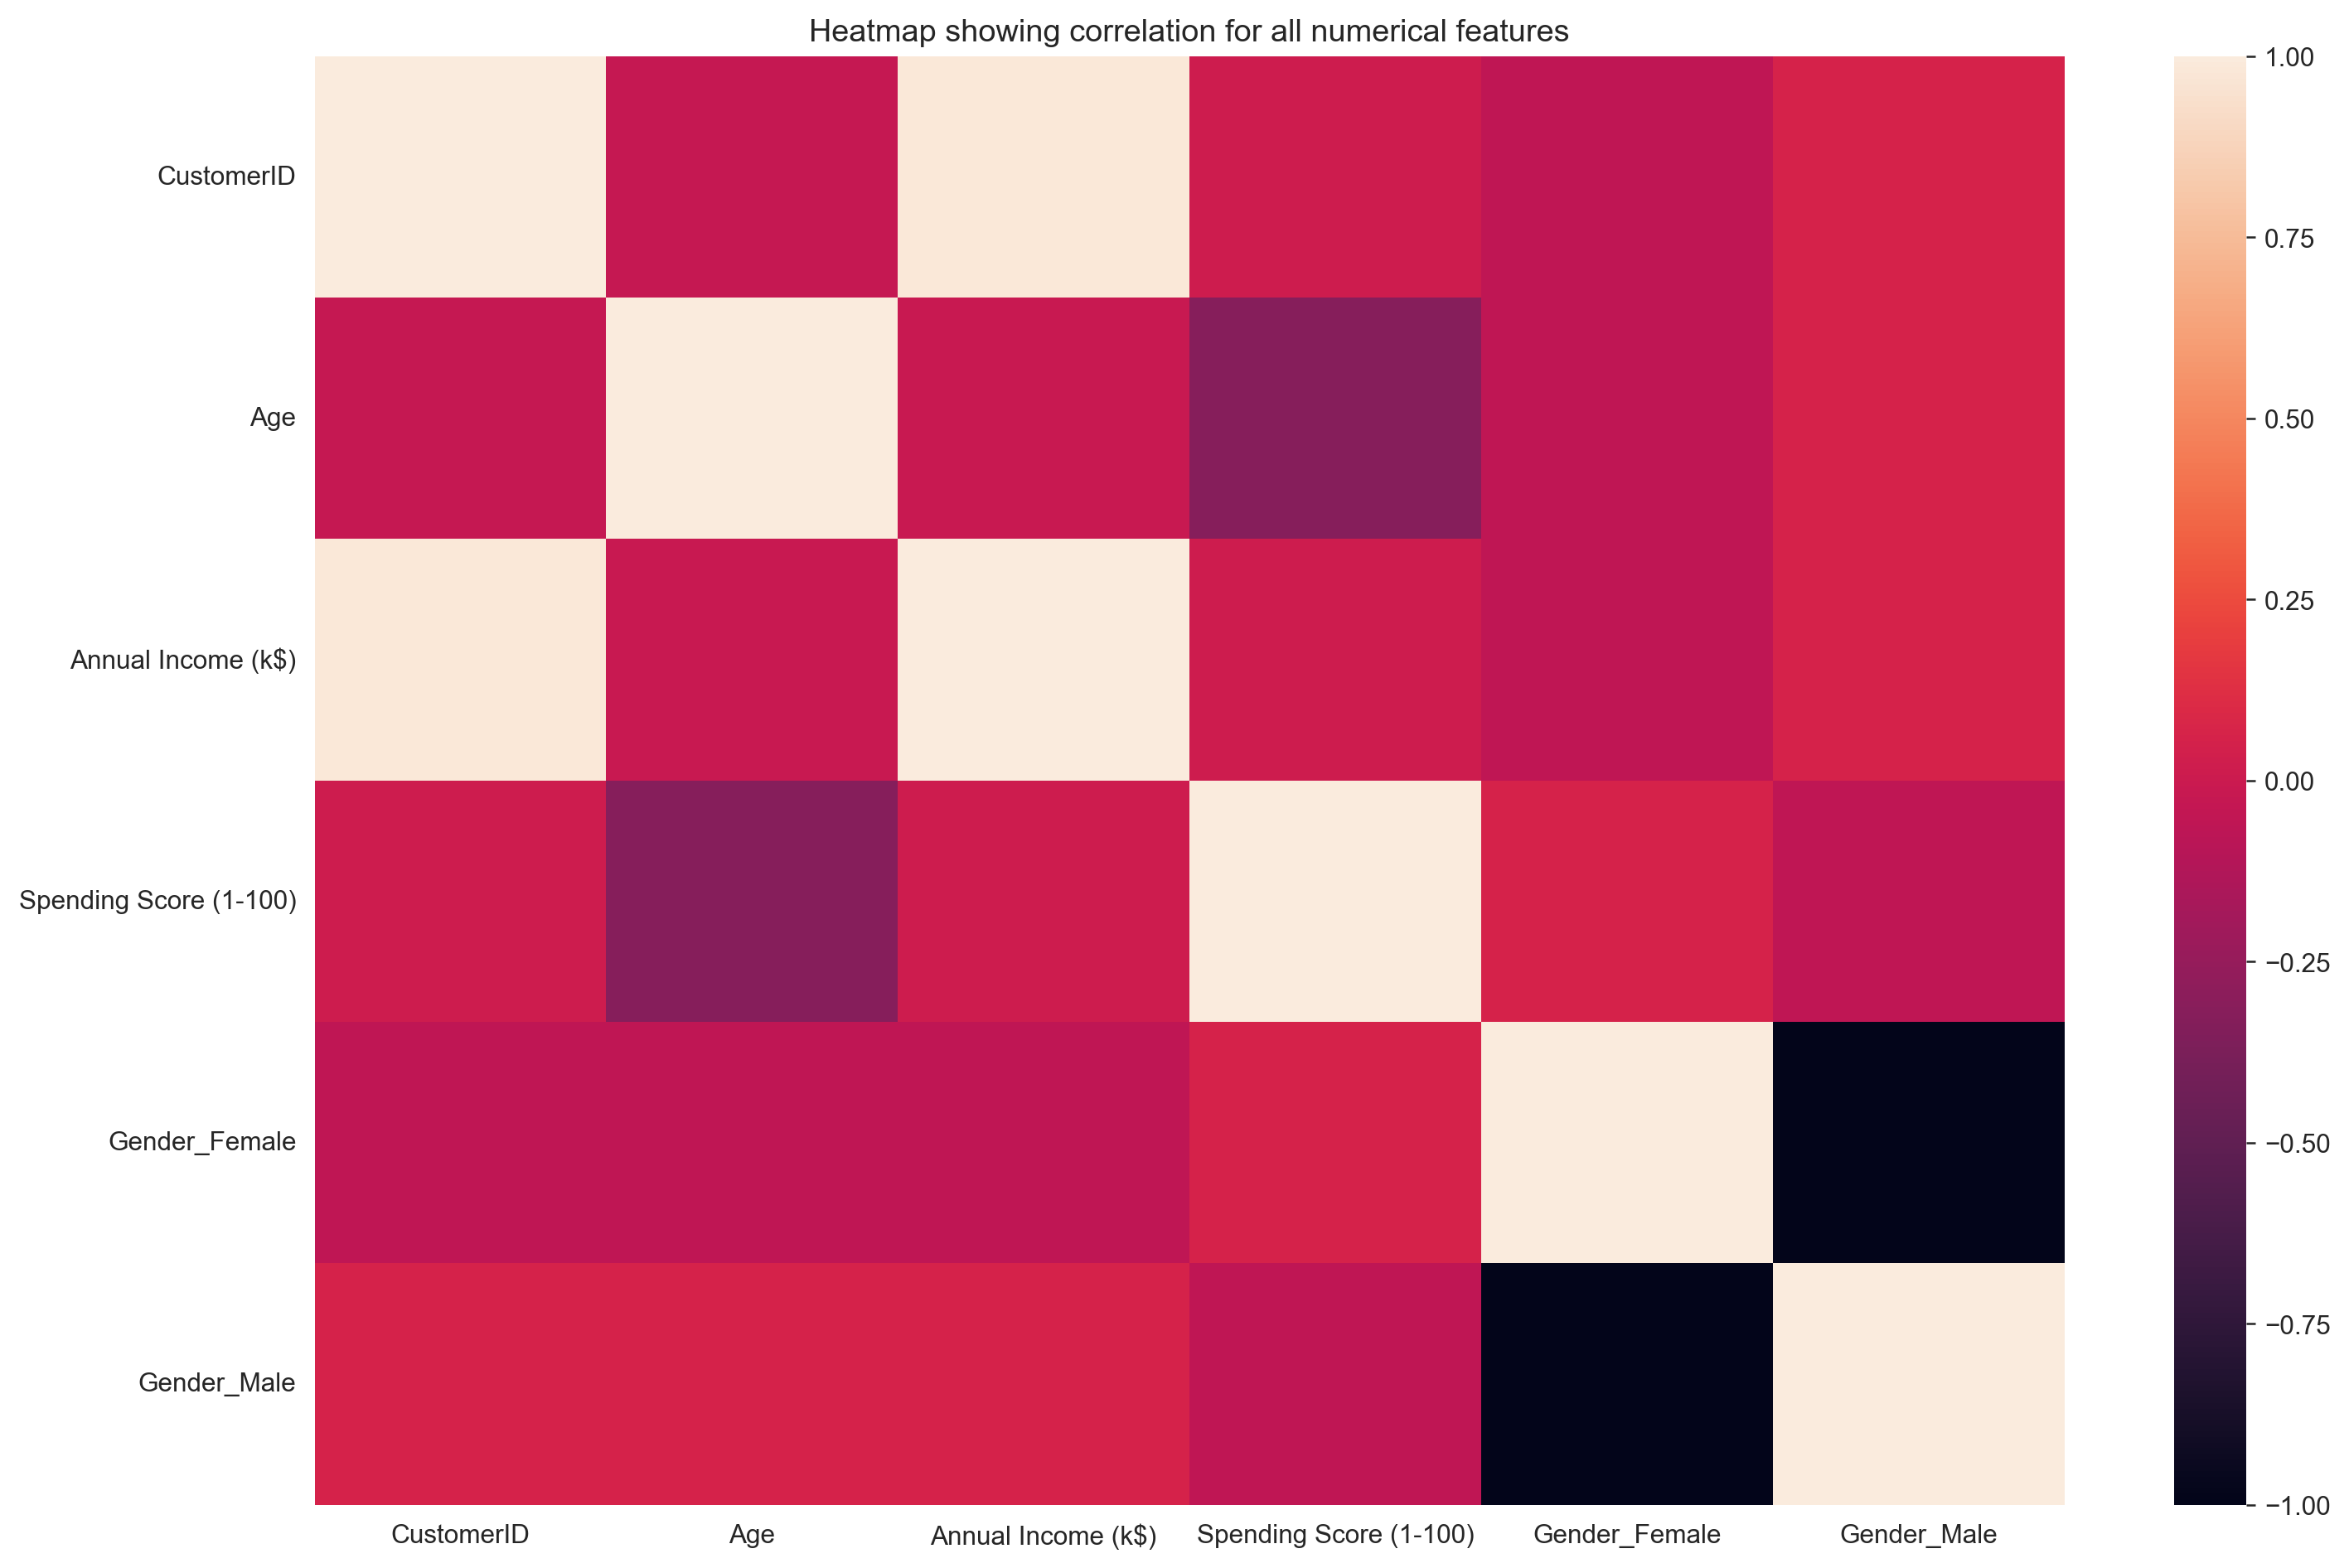

In [132]:
corr_matrix=new_data.corr()
plt.figure(figsize = (15,10))
plt.title("Heatmap showing correlation for all numerical features")
sns.heatmap(corr_matrix)

## Performing MinMax Scaling 

In [133]:
scaler = MinMaxScaler()
new_data= pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)

In [134]:
new_data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.000000,0.019231,0.000000,0.387755,0.0,1.0
1,0.005025,0.057692,0.000000,0.816327,0.0,1.0
2,0.010050,0.038462,0.008197,0.051020,1.0,0.0
3,0.015075,0.096154,0.008197,0.775510,1.0,0.0
4,0.020101,0.250000,0.016393,0.397959,1.0,0.0


## Performing PCA Algorithm

In [135]:
pca = PCA(n_components=2) 
new_data = pca.fit_transform(new_data)

## <b> Using the Elbow Method for finding the optimal number of clusters (K) </b>

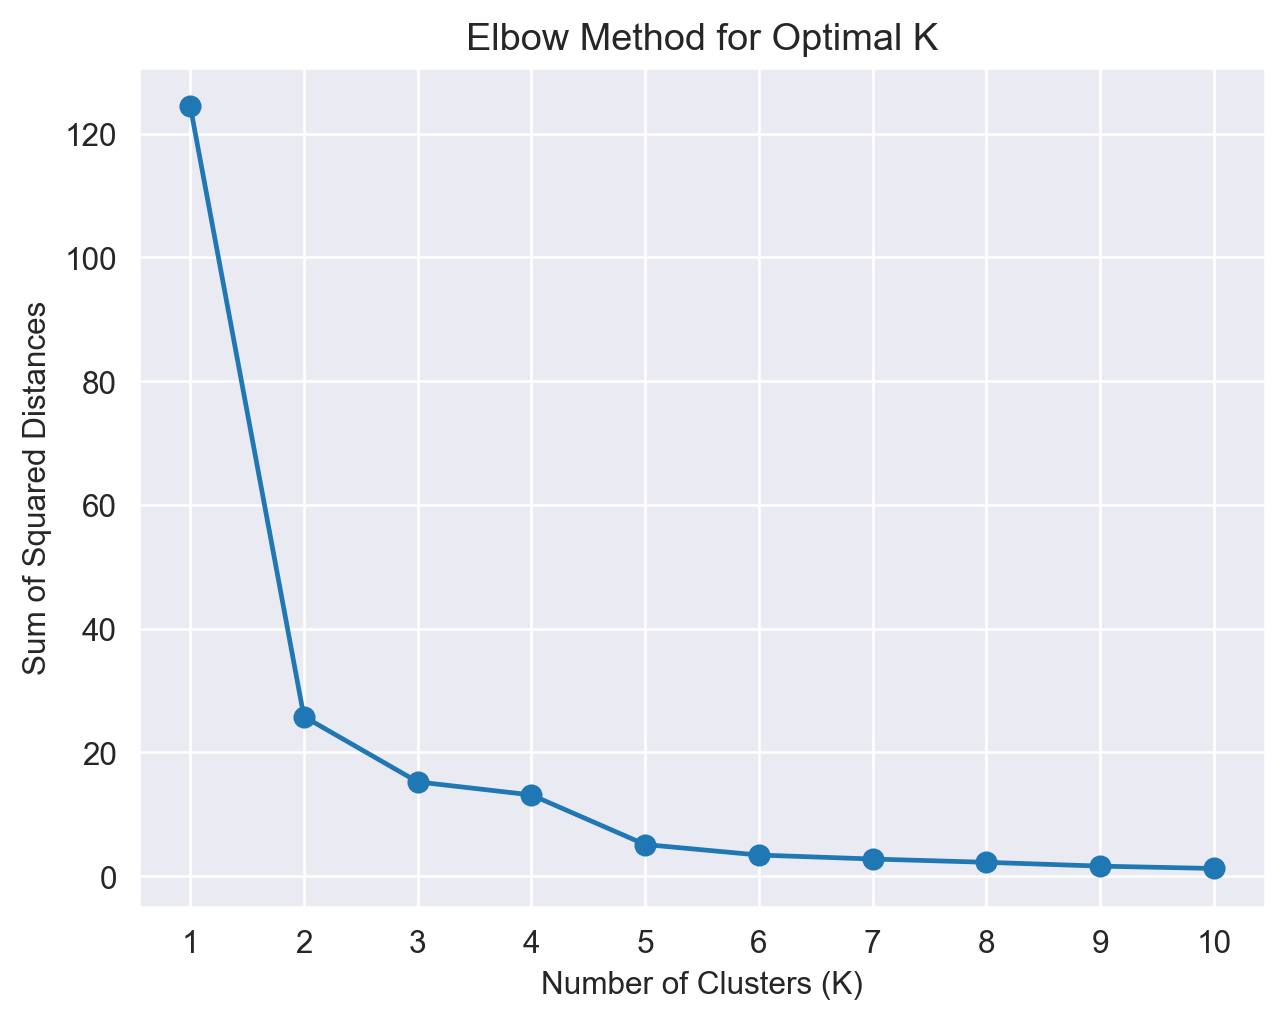

In [136]:
k_values = range(1, 11)  # Evaluate from 1 to 20 clusters

# Calculate the Within-Clusters Sum of Squares (WCSS) for each value of K
costs = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(new_data)
    costs.append( kmeans .inertia_)

# Plot the elbow curve
plt.rcParams['figure.dpi'] = 227
plt.plot(k_values, costs, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.show()

###  Then,  2 is the optimal number of clusters to train our data , so we will apply Kmeans


## Applying Kmeans Clustering

In [137]:
kmeans=KMeans(n_clusters=2).fit(new_data)
clusters=kmeans.cluster_centers_
labels=kmeans.labels_
print("clusters : ",clusters)
print(50*"*")
print("labels : ",labels)

clusters :  [[-0.62278988  0.00584397]
 [ 0.79264167 -0.00743777]]
**************************************************
labels :  [1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


## Plotting the Produced Clusters

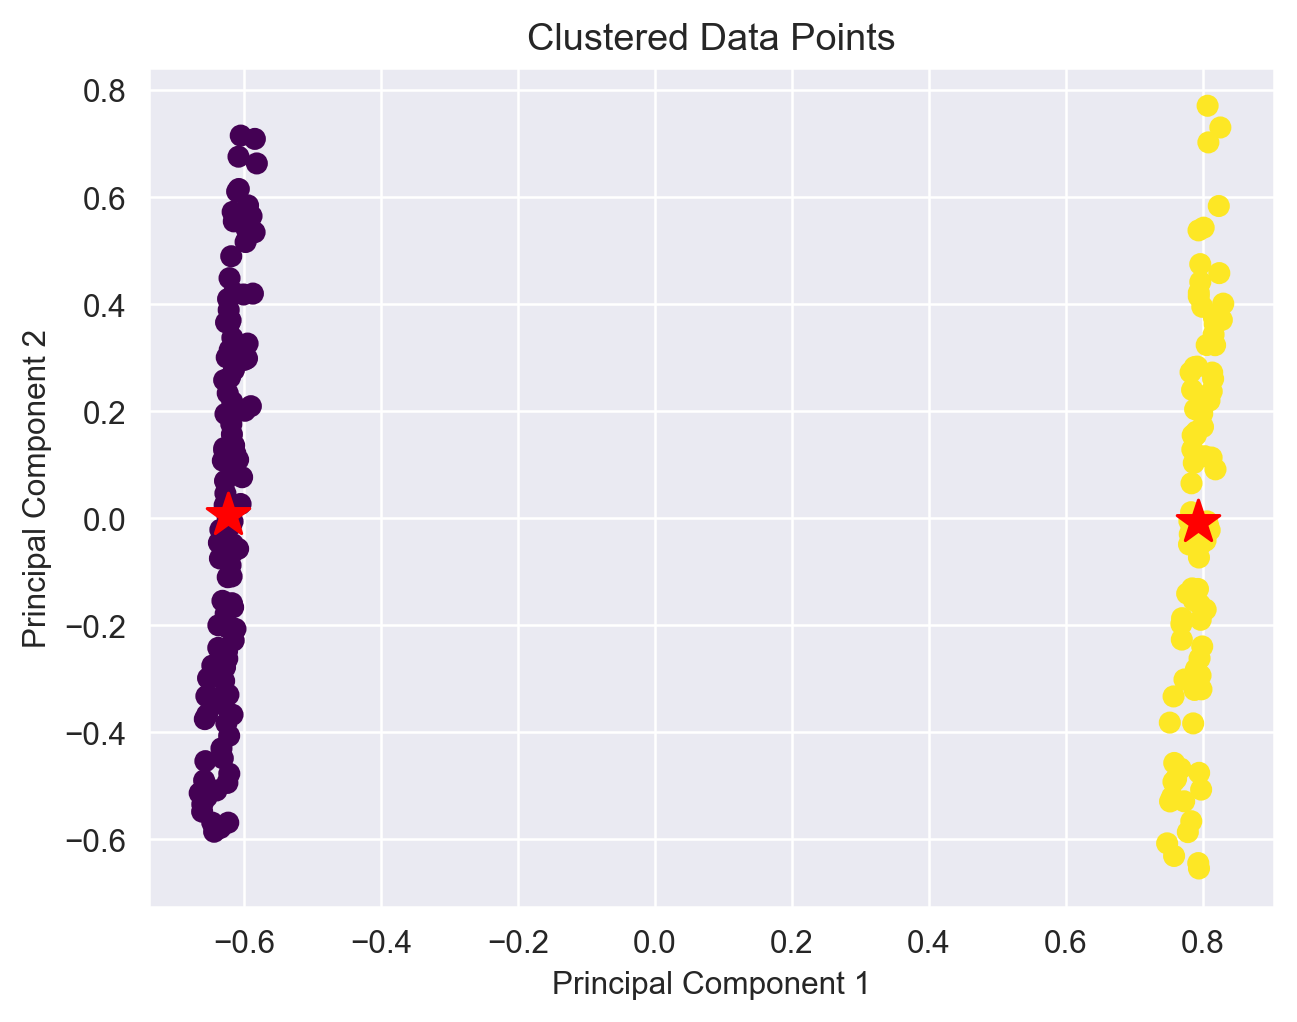

In [138]:
# Plot clustered data points
plt.scatter(new_data[:, 0], new_data[:, 1], c=labels, cmap='viridis')
plt.scatter(clusters[:, 0], clusters[:, 1], c='red', marker='*', s=200)  
plt.title('Clustered Data Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##  <i> Evaluate clustering performance using silhouette score and davies_bouldin_score </i>

In [139]:
k_medoids_silhouette = silhouette_score(new_data, labels)
print("Silhouette Score:", k_medoids_silhouette)


k_medoids_davies_bouldin = davies_bouldin_score(new_data, labels)
print("davies_bouldin:", k_medoids_davies_bouldin)

Silhouette Score: 0.7232082660328618
davies_bouldin: 0.4304392332949172


## “silhouette_score” :-
### measures how similar an object is to its own cluster compared to other clusters.
    Higher silhouette scores indicate better clustering .

## “davies_bouldin_score” :-
### quantifies the average "similarity" between clusters
    and the "dissimilarity" between clusters. Lower Davies-Bouldin scores indicate
    better clustering